<h1><center>K means clustering</center></h1>
<hr style="border:2px solid black"> </hr>

## Imports 

In [ ]:
# ONLY USE THESE IMPORTS.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

## Read Data

In [ ]:
# Read Training Images, Testing Images, Training Labels, Testing Labels
def read_rgb(path,q):
    data =np.array([plt.imread(path+str(i)+'.jpg').reshape(-1) for i in range (0,q)])
    return data
#----------------------------------------------------------------------------------------------------------
train_air = read_rgb('Data/train/airplane/',5000)
train_auto = read_rgb('Data/train/bird/',5000)
train_frog = read_rgb('Data/train/truck/',5000)
#----------------------------------------------------------------------------------------------------------
test_air = read_rgb('Data/test/airplane/',1000)
test_auto = read_rgb('Data/test/bird/',1000)
test_frog = read_rgb('Data/test/truck/',1000)
#----------------------------------------------------------------------------------------------------------

X_train= np.concatenate((train_air,train_auto,train_frog),axis=0) /255
y_train = np.concatenate((np.full((len(train_air),1),1),np.full((len(train_auto),1),2),np.full((len(train_frog),1),3)),axis=0)
X_test = np.concatenate((test_air,test_auto,test_frog),axis=0) /255
y_test = np.concatenate((np.full((len(test_air),1),1),np.full((len(test_auto),1),2),np.full((len(test_frog),1),3)),axis=0)

print(X_train.shape, y_train.shape ,X_test.shape ,y_test.shape )

(15000, 3072) (15000, 1) (3000, 3072) (3000, 1)


<hr style="border:2px solid black"> </hr>
# Perform K means clustering for all 3 classes (Training Data).
### Return (memberships, centroids, dbi) --> (vector, matrix, scalar value).

In [ ]:
def KMeans_train():
    r1=np.random.randint(0, 15000)
    c0=X_train[r1]
    r2=np.random.randint(0, 15000)
    c1=X_train[r2]
    r3=np.random.randint(0, 15000)
    c2=X_train[r3]
    
    
    oldc0=-1*c1
    oldc1=-1*c2
    oldc2=-1*c0

    clustering=[]
    clus0=[]
    clus1=[]
    clus2=[]
    clus0d=[]
    clus1d=[]
    clus2d=[]

    while(not((c0==oldc0).all() and (c1==oldc1).all() and (c2==oldc2).all())):
        oldc0=c0
        oldc1=c1
        oldc2=c2
        clustering=[]
        clus0=[]
        clus1=[]
        clus2=[]
        clus0d=[]
        clus1d=[]
        clus2d=[]

        for i in range(0,len(X_train)):
            d0=np.linalg.norm(c0-X_train[i])
            d1=np.linalg.norm(c1-X_train[i])
            d2=np.linalg.norm(c2-X_train[i])

            if d0==min(d0,d1,d2):
                clustering.append(0)
                clus0.append(X_train[i])
                clus0d.append(d0)
            elif d1==min(d0,d1,d2):
                clustering.append(1)
                clus1.append(X_train[i])
                clus1d.append(d1)

            else:
                clustering.append(2)
                clus2.append(X_train[i])
                clus2d.append(d2)
                

        c0=np.mean(clus0,axis=0)
        c1=np.mean(clus1,axis=0)
        c2=np.mean(clus2,axis=0)
        
    print("=> CONVERGENCE <=")

    s0=np.mean(clus0d)
    s1=np.mean(clus1d)
    s2=np.mean(clus2d)

    m01=np.linalg.norm(c0-c1)
    m02=np.linalg.norm(c0-c2)
    m12=np.linalg.norm(c1-c2)

    r01=(s0+s1)/m01
    r02=(s0+s2)/m02
    r12=(s1+s2)/m12

    memberships=clustering
    dbi=max(r01,r02,r12)
    centroids = [c0,c1,c2]


    return memberships, centroids, dbi

<hr style="border:2px solid black"> </hr>

# Repeat the previous process 10 times. 
### Pick the membership vector and the centroids matrix corresponding to the best dbi.
##### Make sure you return max_counts and confusion_matrix.
(keep history in whatever datastructure you like).

In [ ]:
def counts_train(i ,memberships):
    if(i ==0 ):
        x =memberships[:5000]        
    elif(i==1):
        x =memberships[5000:10000]
    elif(i==2):
        x =memberships[10000:15000]
  
    counts =[x.count(0),x.count(1),x.count(2)]
    count = max(counts)
    index = counts.index(count)
    return count , index ,counts

def counts_test(i ,memberships):
    if(i ==0 ):
        x =memberships[:1000]        
    elif(i==1):
        x =memberships[1000:2000]
    elif(i==2):
        x =memberships[2000:3000]
  
    counts =[x.count(0),x.count(1),x.count(2)]

    return counts

In [ ]:
def test(c0,c1,c2):
    clustering =[] 
    for i in range(0,len(X_test)):
        d0=np.linalg.norm(c0-X_test[i])
        d1=np.linalg.norm(c1-X_test[i])
        d2=np.linalg.norm(c2-X_test[i])

        if d0==min(d0,d1,d2):
            clustering.append(0)
        elif d1==min(d0,d1,d2):
            clustering.append(1)
        else:
            clustering.append(2)
    return clustering
    

In [ ]:
membershipsList=[]
centroidsList=[]
dbiList=[]
for i in range(10):
    print("iteration: ",i)
    memberships, centroids, dbi = KMeans_train()
    membershipsList.append(memberships)
    centroidsList.append(centroids)
    dbiList.append(dbi)
    print("\n")

chosenDBI=min(dbiList)
index=dbiList.index(chosenDBI)
chosenMembership=membershipsList[index]
chosencentroids=centroidsList[index]
best_membership_matrix = chosenMembership
best_centroids = chosencentroids
best_dbi = chosenDBI

max_counts = [counts_train(0,best_membership_matrix)[0],counts_train(1,best_membership_matrix)[0] ,counts_train(2,best_membership_matrix)[0]]
predictors = [counts_train(0,best_membership_matrix)[1],counts_train(1,best_membership_matrix)[1] ,counts_train(2,best_membership_matrix)[1]]


predictions = test(best_centroids[predictors[0]] ,best_centroids[predictors[1]] ,best_centroids[predictors[2]])

confusion_matrix = [counts_test(0,predictions),counts_test(1,predictions) ,counts_test(2,predictions)]

confusion_matrix =np.array(confusion_matrix)

iteration:  0
=> CONVERGENCE <=


iteration:  1
=> CONVERGENCE <=


iteration:  2
=> CONVERGENCE <=


iteration:  3
=> CONVERGENCE <=


iteration:  4
=> CONVERGENCE <=


iteration:  5
=> CONVERGENCE <=


iteration:  6
=> CONVERGENCE <=


iteration:  7
=> CONVERGENCE <=


iteration:  8
=> CONVERGENCE <=


iteration:  9
=> CONVERGENCE <=




<hr style="border:2px solid black"> </hr>

## Don't Edit the Following Cells, Just Run & Save them.

Text(0.5, 1.0, 'Best Counts')

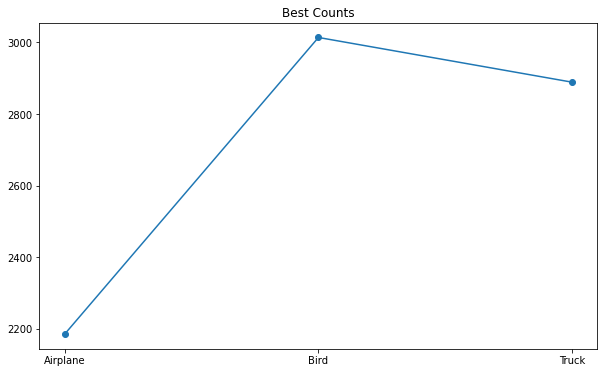

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(['Airplane','Bird','Truck'],max_counts,'-o')
plt.title('Best Counts')

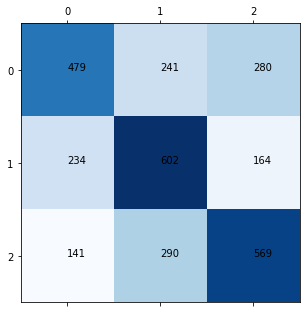

In [ ]:
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))